In [224]:
import os
import numpy as np
from bitstring import Bits
import matplotlib.pyplot as plt

In [225]:
DATAPATH = "data"
data = []

print(os.listdir(DATAPATH))

['INL_ideal_SW_ideal_CDAC.csv', 'sine_4.4725M_mismatch_1.csv', 'INL_TG_ideal_CDAC.csv', 'INL_mismatch_3_noisy.csv', 'INL_enhanced_TG_ideal_CDAC.csv', 'sine_0.31M_mismatch_1.csv', 'INL_pismatch_1_noisy_unbalance.csv', 'INL_mismatch_1_noisy.csv', 'sine_0.2303M_mismatch_1.csv']


In [226]:
with open(os.path.join(DATAPATH, "sine_4.4725M_mismatch_1.csv")) as f:
    data = f.readlines()

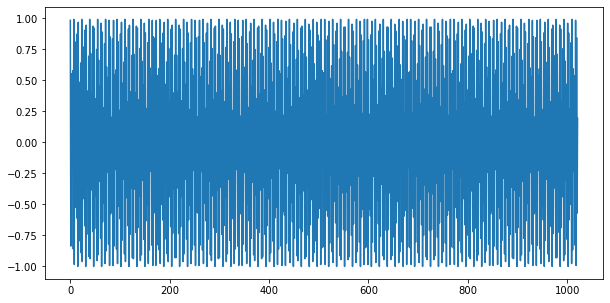

0.9921875


In [251]:
processed_data = np.zeros(shape=(len(data) - 1, 2))

for i in range(1, len(data)):
    temp = data[i].split(",")
    processed_data[i - 1, 0] = float(temp[0])
    processed_data[i - 1, 1] = (Bits(bin=temp[1]).int) / 128

#print(processed_data)
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(processed_data[:,1])
plt.show()

print(max(processed_data[:,1]))

In [228]:
windowed_data = np.hamming(len(processed_data[:,1])) * processed_data[:,1]

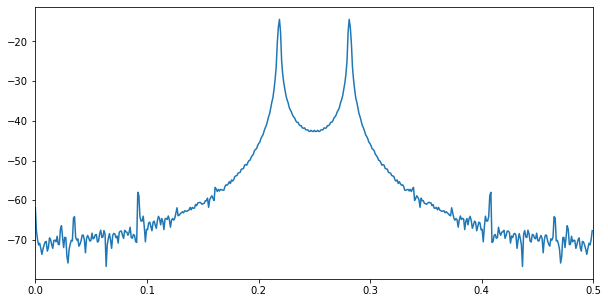

In [286]:
spectrum = np.abs(np.fft.fft(windowed_data / len(windowed_data)))
#spectrum = np.abs(np.fft.fft(processed_data[:,1]))
spectrum_in_dB = 20 * np.log10(spectrum)
plt.xlim(0, 0.5)
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(np.arange(0, 0.5, 0.5/512), spectrum_in_dB[: 512])
plt.show()

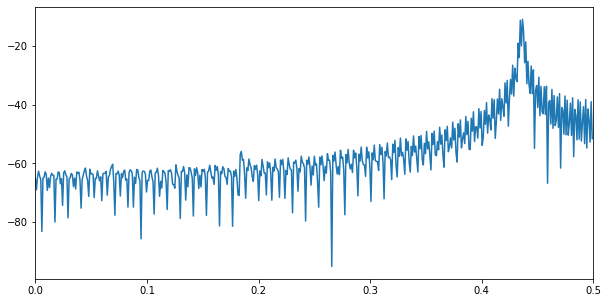

-10.932596655611803


In [294]:
spectrum = np.abs(np.fft.fft(processed_data[:,1] / len(processed_data[:,1])))
#spectrum = np.abs(np.fft.fft(processed_data[:,1]))
spectrum_in_dB = 20 * np.log10(spectrum)
plt.xlim(0, 0.5)
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(np.arange(0, 0.5, 0.5/512), spectrum_in_dB[: 512])
plt.show()

print(max(spectrum_in_dB))

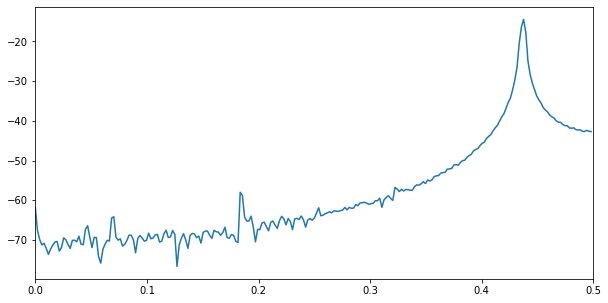

-14.423150275650405


In [292]:
zero_pad = []

for i in range(512):
    zero_pad.append(processed_data[i,1])

zero_pad = np.array(zero_pad)
windowed_data = np.hamming(len(zero_pad)) * zero_pad

spectrum = np.abs(np.fft.fft(windowed_data / len(windowed_data)))
#spectrum = np.abs(np.fft.fft(processed_data[:,1]))
spectrum_in_dB = 20 * np.log10(spectrum)
plt.xlim(0, 0.5)
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(np.arange(0, 0.5, 1/512), spectrum_in_dB[: 256])
plt.show()

print(max(spectrum_in_dB))

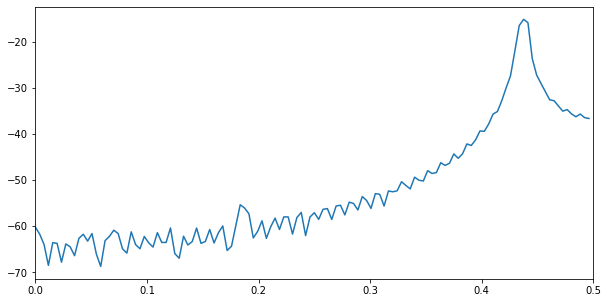

-15.184403296183469


In [293]:
zero_pad = []

for i in range(256):
    zero_pad.append(processed_data[i,1])

zero_pad = np.array(zero_pad)
windowed_data = np.hamming(len(zero_pad)) * zero_pad

spectrum = np.abs(np.fft.fft(windowed_data / len(windowed_data)))
#spectrum = np.abs(np.fft.fft(processed_data[:,1]))
spectrum_in_dB = 20 * np.log10(spectrum)
plt.xlim(0, 0.5)
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(np.arange(0, 0.5, 2/512), spectrum_in_dB[: 128])
plt.show()
print(max(spectrum_in_dB))

In [290]:
print(max(spectrum_in_dB))
print(max(spectrum_in_dB[100: 200]))
print("\n")
print("SFDR:    {:.2f} dB".format(max(spectrum_in_dB) - max(spectrum_in_dB[100:200])))

-15.184403296183469
-15.184403296183469


SFDR:    0.00 dB


In [291]:
print(np.argmax(spectrum))
print(np.mean(spectrum[0: 100]))

sndr = 10 * np.log10(np.sum(spectrum[447 - 5: 447 + 5] ** 2) / (512 * np.mean(spectrum[0:100] ** 2)))

print("\n")
print("SNDR:    {:.2f} dB".format(sndr))
print("ENOB:    {:.2f} Bit".format((sndr - 1.76) / 6.02))

112
0.0015645151559872136


SNDR:    -inf dB
ENOB:    -inf Bit


In [255]:
10 * np.log10(10**(-8) * 2048)

-46.88670047696207